In [1]:
## Classification Algorithms

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

In [2]:
# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, chi2

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('german_.data.csv', header=0, names = ["chk_acct", "duration", "credit_his", "purpose", 
                            "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", 
                            "present_resid", "property", "age", "other_install", "housing", "n_credits", 
                            "job", "n_people", "telephone", "foreign", "response"])
#data = data.drop(['telephone'], axis=1)
data.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,no
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,yes
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,no
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,no
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,yes


### Data preprocessing

In [5]:

data_c = data[["chk_acct", "duration", "credit_his", "purpose", 
                            "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", 
                            "present_resid", "property", "age", "other_install", "housing", "n_credits", 
                            "job", "n_people",'telephone', "foreign", "response"]].copy()

In [6]:
data_c['chk_acct'] = data_c['chk_acct'].map({'A11':1, 'A12':2, 'A13':3, 'A14':4})

In [7]:
data_c['purpose'] = data_c['purpose'].map({'A40':1, 'A41':2, 'A42':3, 'A43':4, 'A44':5, 'A45':6,
                                          'A46':7, 'A47':8, 'A48':9, 'A49':10, 'A410':11})

In [8]:
data_c['saving_acct'] = data_c['saving_acct'].map({'A61':1, 'A62':2, 'A63':3, 'A64':4, 'A65':5})

In [9]:
data_c['present_emp'] = data_c['present_emp'].map({'A71':1, 'A72':2, 'A73':3, 'A74':4, 'A75':5})

In [10]:
data_c['sex'] = data_c['sex'].map({'A91':1, 'A92':2, 'A93':3, 'A94':4, 'A95':5})

In [11]:
data_c['other_debtor'] = data_c['other_debtor'].map({'A101':1, 'A102':2, 'A103':3})

In [12]:
data_c['property'] = data_c['property'].map({'A121':1, 'A122':2, 'A123':3, 'A124':4})

In [13]:
data_c['other_install'] = data_c['other_install'].map({'A141':1, 'A142':2, 'A143':3})

In [14]:
data_c['housing'] = data_c['housing'].map({'A151':1, 'A152':2, 'A153':3})

In [15]:
data_c['job'] = data_c['job'].map({'A171':1, 'A172':2, 'A173':3, 'A174':4})

In [16]:
data_c['foreign'] = data_c['foreign'].map({'A201':1, 'A202':2})

In [17]:
data_c['telephone'] = data_c['telephone'].map({'A191':1, 'A192':2})

In [18]:
data_c['credit_his'] = data_c['credit_his'].map({'A30':1, 'A31':2, 'A32':3, 'A33':4, 'A34':5})

In [19]:
data_c['response'] = data_c['response'].map({'yes':1, 'no':0})

In [20]:
data_c.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,1,6,5,4,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,0
1,2,48,3,4,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,1
2,4,12,5,7,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,0
3,1,42,3,3,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,0
4,1,24,4,1,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,1


In [21]:
x = data_c.iloc[:,:-1]

y = data_c['response']

In [22]:
x.shape, y.shape

((1000, 20), (1000,))

In [23]:
y.value_counts()

response
0    700
1    300
Name: count, dtype: int64

### Univariate feature selection with F-score

In [24]:
f_score = chi2(x, y)

In [25]:
f_score

(array([7.54742687e+01, 3.21030795e+02, 1.73043858e+01, 6.35368463e-01,
        5.82624900e+04, 3.79374505e+01, 5.79989868e+00, 2.20461935e+00,
        1.45229218e+00, 1.25805781e-01, 3.76600552e-03, 9.50353407e+00,
        3.02003092e+01, 2.24343569e+00, 5.45310919e-02, 4.95515619e-01,
        1.57483930e-01, 1.03071532e-03, 2.28055895e-01, 2.31482757e-01]),
 array([3.70199973e-18, 8.63719683e-72, 3.18451011e-05, 4.25392937e-01,
        0.00000000e+00, 7.30494431e-10, 1.60270980e-02, 1.37597855e-01,
        2.28160509e-01, 7.22821015e-01, 9.51066305e-01, 2.05076531e-03,
        3.89647345e-08, 1.34182544e-01, 8.15358470e-01, 4.81477175e-01,
        6.91483645e-01, 9.74388511e-01, 6.32969115e-01, 6.30426559e-01]))

In [25]:
p_values = pd.Series(f_score[1], index=x.columns)
p_values.sort_values(ascending=True, inplace=True)
p_values

amount              0.000000e+00
duration            8.637197e-72
chk_acct            3.702000e-18
saving_acct         7.304944e-10
age                 3.896473e-08
credit_his          3.184510e-05
property            2.050765e-03
present_emp         1.602710e-02
other_install       1.341825e-01
installment_rate    1.375979e-01
sex                 2.281605e-01
purpose             4.253929e-01
n_credits           4.814772e-01
foreign             6.304266e-01
telephone           6.329691e-01
job                 6.914836e-01
other_debtor        7.228210e-01
housing             8.153585e-01
present_resid       9.510663e-01
n_people            9.743885e-01
dtype: float64

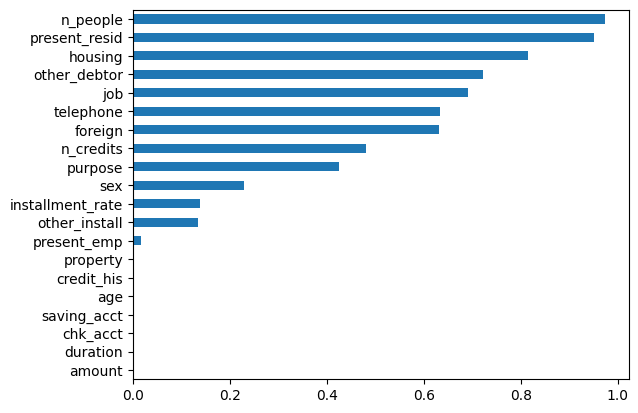

In [26]:
p_values.plot.barh() # 7 variables are selected
plt.savefig('f-score.pdf', dpi = 300, bbox_inches = 'tight')